In [0]:
import json
import calendar
import random
from datetime import date, timedelta

import faker
import numpy as np
from pandas import DataFrame
from delorean import parse
import pandas as pd
# make the graphs nicer
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#pd.set_option('display.mpl_style', 'default')

In [0]:
fake = faker.Faker()

In [0]:
usernames = set() # set 형이므로 중복값 허용 안함
usernames_no = 1000
# populate the set with 1000 unique usernames
while len(usernames) < usernames_no:
  usernames.add(fake.user_name())


In [0]:
def get_random_name_and_gender():
  skew = .6 # 60% of users will be female
  male = random.random() > skew
  if male:
    return fake.name_male(), 'M'
  else:
    return fake.name_female(), 'F'

In [16]:
def get_users(usernames):
  users = []
  for username in usernames:
    name, gender = get_random_name_and_gender()
    user = {
        'username' : username,
        'name' : name,
        'gender' : gender,
        'email' : fake.email(),
        'age' : fake.random_int(min=18, max=90),
        'address' : fake.address(),
    }
    users.append(json.dumps(user))
  return users

users = get_users(usernames)
users[:3]

['{"username": "roger08", "name": "Mark Miller", "gender": "M", "email": "smartinez@carrillo-garcia.info", "age": 82, "address": "1641 Krueger Place Suite 307\\nLake Kelsey, RI 13165"}',
 '{"username": "tracey97", "name": "Mark Vasquez", "gender": "M", "email": "christinawhite@hotmail.com", "age": 52, "address": "8595 Baker Islands\\nKellyville, OR 46940"}',
 '{"username": "brian27", "name": "John Santos", "gender": "M", "email": "chavezthomas@perry-mooney.com", "age": 27, "address": "Unit 8407 Box 1152\\nDPO AA 61846"}']

In [0]:
# campaign name format:
# InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency

def get_type():
  # just some gibberish internal codes
  types = ['AKX','BYU','GRZ','KTR']
  return random.choice(types)

def get_start_end_dates():
  duration = random.randint(1, 2 * 365)
  offset = random.randint(-365,365)
  start = date.today() - timedelta(days=offset) # 시작일
  end = start  + timedelta(days= duration) # 종료일

  def _format_date(date_):
    return date_.strftime("%Y%m%d")

  return _format_date(start), _format_date(end)

def get_age(): # 목표 연령 설정
  age = random.randint(20,45)
  age -= age % 5 # 28 - (28 % 5 = 3) = 25
  diff = random.randint(5,25)
  diff -= diff % 5
  return '{}-{}'.format(age,age + diff)

def get_gender():
  return random.choice(('M','F','B'))

def get_currency():
  return random.choice(('GBP','EUR','USD'))

def get_campaign_name():
  separator = '_'
  type_ = get_type()
  start_end = separator.join(get_start_end_dates())
  age = get_age()
  gender = get_gender()
  currency = get_currency()
  return separator.join(
      (type_, start_end, age, gender, currency))
  


In [0]:
def get_campaign_data():
  name = get_campaign_name()
  # random.randint : random integrer between two extremes.
  budget = random.randint(10**3, 10**6)
  spent = random.randint(10**2, budget) 
  clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))
  impressions = int(random.gauss(0.5 * 10**6, 2))
  return{
      'cmp_name' : name,
      'cmp_bgt' : budget,
      'cmp_spent' : spent,
      'cmp_clicks' : clicks,
      'cmp_impr' : impressions
  }

In [0]:
def get_data(users):
  data = []
  for user in users:
    campaigns = [get_campaign_data() for _ in range(random.randint(2,8))]
    data.append({'user': user, 'campaigns': campaigns})
  return data

In [85]:
rough_data = get_data(users)
rough_data[:2]

[{'campaigns': [{'cmp_bgt': 727044,
    'cmp_clicks': 11080,
    'cmp_impr': 500002,
    'cmp_name': 'GRZ_20190427_20200501_25-50_M_GBP',
    'cmp_spent': 644818},
   {'cmp_bgt': 387583,
    'cmp_clicks': 32765,
    'cmp_impr': 500001,
    'cmp_name': 'BYU_20200312_20220302_25-40_F_EUR',
    'cmp_spent': 375996},
   {'cmp_bgt': 997528,
    'cmp_clicks': 18635,
    'cmp_impr': 500000,
    'cmp_name': 'BYU_20190623_20200528_40-55_M_EUR',
    'cmp_spent': 919108},
   {'cmp_bgt': 297319,
    'cmp_clicks': 33799,
    'cmp_impr': 499998,
    'cmp_name': 'KTR_20200225_20200609_30-40_F_EUR',
    'cmp_spent': 4097},
   {'cmp_bgt': 50565,
    'cmp_clicks': 27540,
    'cmp_impr': 500000,
    'cmp_name': 'BYU_20200606_20201214_25-45_M_GBP',
    'cmp_spent': 30031}],
  'user': '{"username": "roger08", "name": "Mark Miller", "gender": "M", "email": "smartinez@carrillo-garcia.info", "age": 82, "address": "1641 Krueger Place Suite 307\\nLake Kelsey, RI 13165"}'},
 {'campaigns': [{'cmp_bgt': 345823,
  

In [86]:
data = []
for datum in rough_data:
  for campaign in datum['campaigns']:
    campaign.update({'user':datum['user']})
    data.append(campaign)
    
data[:2] #let's take another peek


[{'cmp_bgt': 727044,
  'cmp_clicks': 11080,
  'cmp_impr': 500002,
  'cmp_name': 'GRZ_20190427_20200501_25-50_M_GBP',
  'cmp_spent': 644818,
  'user': '{"username": "roger08", "name": "Mark Miller", "gender": "M", "email": "smartinez@carrillo-garcia.info", "age": 82, "address": "1641 Krueger Place Suite 307\\nLake Kelsey, RI 13165"}'},
 {'cmp_bgt': 387583,
  'cmp_clicks': 32765,
  'cmp_impr': 500001,
  'cmp_name': 'BYU_20200312_20220302_25-40_F_EUR',
  'cmp_spent': 375996,
  'user': '{"username": "roger08", "name": "Mark Miller", "gender": "M", "email": "smartinez@carrillo-garcia.info", "age": 82, "address": "1641 Krueger Place Suite 307\\nLake Kelsey, RI 13165"}'}]

In [87]:
df = DataFrame(data)
df.head()

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
0,GRZ_20190427_20200501_25-50_M_GBP,727044,644818,11080,500002,"{""username"": ""roger08"", ""name"": ""Mark Miller"",..."
1,BYU_20200312_20220302_25-40_F_EUR,387583,375996,32765,500001,"{""username"": ""roger08"", ""name"": ""Mark Miller"",..."
2,BYU_20190623_20200528_40-55_M_EUR,997528,919108,18635,500000,"{""username"": ""roger08"", ""name"": ""Mark Miller"",..."
3,KTR_20200225_20200609_30-40_F_EUR,297319,4097,33799,499998,"{""username"": ""roger08"", ""name"": ""Mark Miller"",..."
4,BYU_20200606_20201214_25-45_M_GBP,50565,30031,27540,500000,"{""username"": ""roger08"", ""name"": ""Mark Miller"",..."


In [88]:
df.count()

cmp_name      5001
cmp_bgt       5001
cmp_spent     5001
cmp_clicks    5001
cmp_impr      5001
user          5001
dtype: int64

In [89]:
df.describe()

,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr
count,5001.000000,5001.000000,5001.000000,5001.000000
mean,498275.613877,248344.566687,40068.736053,499999.477504
std,286631.283066,219918.331792,21758.944816,2.025326
min,1155.000000,126.000000,948.000000,499993.000000
25%,252754.000000,66182.000000,22104.000000,499998.000000
50%,498573.000000,184528.000000,37014.000000,499999.000000
75%,745714.000000,379968.000000,55265.000000,500001.000000
max,999978.000000,983630.000000,99335.000000,500007.000000


In [90]:
df.sort_values(by=['cmp_bgt'], ascending=False).head(3)

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
4747,BYU_20190710_20200717_35-45_B_GBP,999978,161697,22748,499999,"{""username"": ""jon97"", ""name"": ""Jamie Robinson""..."
1002,GRZ_20201011_20220311_40-45_B_EUR,999856,270552,33993,500001,"{""username"": ""williampadilla"", ""name"": ""Janet ..."
3298,AKX_20200429_20201108_30-40_M_USD,999615,239054,21074,500000,"{""username"": ""vincentoconnor"", ""name"": ""Samuel..."


## Unpacking the campaign name


In [91]:
def unpack_campaign_name(name):
  # very optimistic method, assumes data in campaign name
  # is always in good state
  type_, start, end, age, gender, currency = name.split('_')
  start = parse(start).date
  end = parse(end).date
  return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = ['Type', 'Start', 'End', 'Age', ' Gender', 'Currency']
campaign_df = DataFrame(
    campaign_data.tolist(),columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Age,Gender,Currency
0,GRZ,2019-04-27,2020-01-05,25-50,M,GBP
1,BYU,2020-12-03,2022-02-03,25-40,F,EUR
2,BYU,2019-06-23,2020-05-28,40-55,M,EUR


In [0]:
df = df.join(campaign_df)

In [93]:
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,GRZ_20190427_20200501_25-50_M_GBP,GRZ,2019-04-27,2020-01-05,25-50,M,GBP
1,BYU_20200312_20220302_25-40_F_EUR,BYU,2020-12-03,2022-02-03,25-40,F,EUR
2,BYU_20190623_20200528_40-55_M_EUR,BYU,2019-06-23,2020-05-28,40-55,M,EUR


## Unpacking the user data


In [0]:
def unpack_user_json(user):
  # very optimistic as well, expects user objects
  # to have all attributes
  user = json.loads(user.strip())
  return [
          user['username'],
          user['email'],
          user['name'],
          user['gender'],
          user['age'],
          user['address'],
  ]

user_data = df['user'].apply(unpack_user_json)
user_cols = [
             'username','email','name','gender','age','address']
user_df = DataFrame(
    user_data.tolist(), columns = user_cols, index=df.index)



In [95]:
df = df.join(user_df)
df[['user'] + user_cols].head(2)

,user,username,email,name,gender,age,address
0,"{""username"": ""roger08"", ""name"": ""Mark Miller"",...",roger08,smartinez@carrillo-garcia.info,Mark Miller,M,82,"1641 Krueger Place Suite 307\nLake Kelsey, RI ..."
1,"{""username"": ""roger08"", ""name"": ""Mark Miller"",...",roger08,smartinez@carrillo-garcia.info,Mark Miller,M,82,"1641 Krueger Place Suite 307\nLake Kelsey, RI ..."


In [96]:
df.columns

Index(['cmp_name', 'cmp_bgt', 'cmp_spent', 'cmp_clicks', 'cmp_impr', 'user',
       'Type', 'Start', 'End', 'Age', ' Gender', 'Currency', 'username',
       'email', 'name', 'gender', 'age', 'address'],
      dtype='object')

In [0]:
better_columns = [
                  'Budget','Clicks','Impressions',
                  'cmp_name','Spent','user',
                  'Type','Start','End',
                  'Target Age', 'Target Gender', 'Currency',
                  'Username', 'Email', 'Name',
                  'Gender', 'Age', 'Address',
]
df.columns = better_columns

In [0]:
def calculate_extra_columns(df):
  # Click Through Rate
  df['CTR'] = df['Clicks'] / df['Impressions']
  # Cost Per Click
  df['CPC'] = df['Spent'] / df['Clicks']
  # Cost Per Impression
  df['CPI'] = df['Spent'] / df['Impressions']

calculate_extra_columns(df)

In [99]:
df[['Spent', 'Clicks', 'Impressions','CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,500002,727044,644818,1.127518,0.687719,0.775416
1,500001,387583,375996,1.030817,1.290049,1.329804
2,500000,997528,919108,1.085322,0.501239,0.544006


In [100]:
clicks = df['Clicks'][0]
ipmressions = df['Impressions'][0]
spent = df['Spent'][0]
CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]
print('CTR:', CTR, clicks/ipmressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent/ ipmressions)


CTR: 1.1275181524088969 1.1275181524088969
CPC: 0.687719037637337 0.687719037637337
CPI: 0.7754156986932746 0.7754156986932746


In [0]:
def get_day_of_the_week(day):
  number_to_day = dict(enumerate(calendar.day_name,1))
  #enumerate : index 번호와 해당하는 values 반환, 두번째 인수는 시작 인덱스
  #enumerate(calendar.day_name) : (1,'Monday'), (2,'Tuesday') ...
  return number_to_day[day.isoweekday()]
  #isoweekday : 월요일 1~ 일요일 7로 나타냄, weekday와 동일한 역할이지만
  #표시 방법이 다름

def get_duration(row):
  return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration,axis=1)

In [102]:
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2019-04-27,2020-01-05,253,Saturday
1,2020-12-03,2022-02-03,427,Thursday
2,2019-06-23,2020-05-28,340,Sunday


## Cleaning everything up


In [0]:
final_columns = [
 'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
 'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
 'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
 'Name', 'Gender', 'Age'
]
df = df[final_columns]

## Saving the DataFrame to a file


In [0]:
df.to_csv('df,csv')
df.to_json('df.json')
df.to_excel('df.xls')

## Visualizing the results


In [0]:
%matplotlib inline

In [0]:
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

In [107]:
df.describe()

,Duration,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,367.000000,498275.613877,248344.566687,499999.477504,9.560399,3.453166,22.445752,53.779444
std,246.958699,286631.283066,219918.331792,2.025326,68.592845,13.831365,142.528624,21.254975
min,-332.000000,1155.000000,126.000000,499993.000000,1.000480,0.500010,0.508320,18.000000
25%,176.000000,252754.000000,66182.000000,499998.000000,1.325777,0.670496,1.315900,36.000000
50%,364.000000,498573.000000,184528.000000,499999.000000,1.991345,1.002852,2.709610,55.000000
75%,556.000000,745714.000000,379968.000000,500001.000000,4.225450,1.978204,7.554939,72.000000
max,1064.000000,999978.000000,983630.000000,500007.000000,2306.915323,432.895238,3968.230159,90.000000


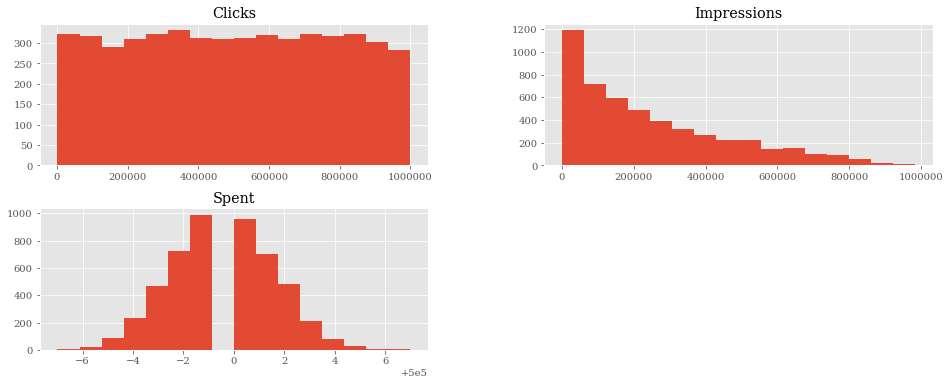

In [108]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
 bins=16, figsize=(16, 6)); # ; 를 붙이면 그래프만 나온다.

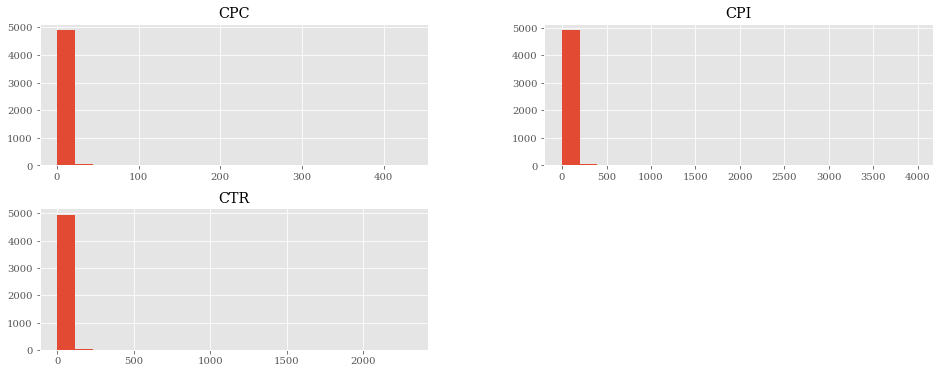

In [109]:
df[['CTR', 'CPC', 'CPI']].hist(bins=20, figsize=(16, 6));

In [110]:
mask = (df.Spent > 0.75 * df.Budget)
df[mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
 bins=15, figsize=(16, 6), color='g');

TypeError: ignored

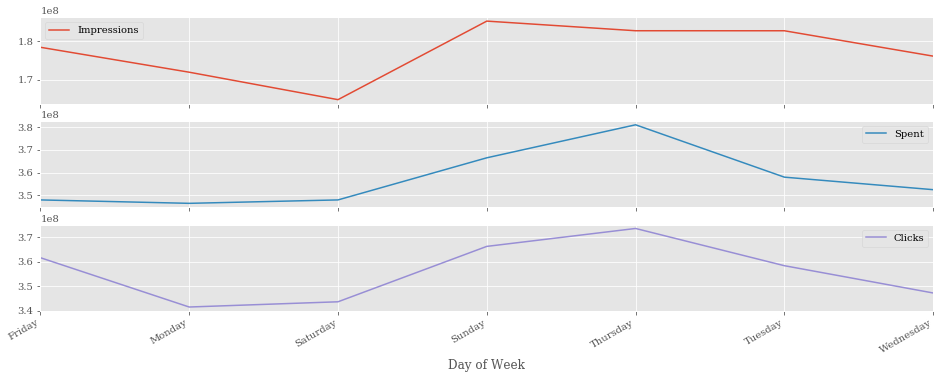

In [111]:
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(
 figsize=(16, 6), subplots=True);

In [112]:
agg_config = {
 'Impressions': {
 'Mean Impr': 'mean',
 'Std Impr': 'std',
 },
 'Spent': ['mean', 'std'],
}
df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


Impressions                         Spent          
                              Mean Impr       Std Impr           mean       std
Target Gender Target Age                                                       
B             20-25       253095.906977  220118.048782  499999.627907  1.860085
              20-30       246278.957895  211049.882019  499999.673684  1.812733
              20-35       264852.931507  197293.628399  499999.767123  1.940222
              20-40       228321.488095  208434.517524  499999.476190  2.170316
              20-45       236630.157895  218371.855559  499999.789474  2.016018
...                                 ...            ...            ...       ...
M             45-50       232670.947368  248178.780115  499998.473684  1.775400
              45-55       254181.400000  205905.294496  499999.466667  2.065591
              45-60       239934.000000  263584.741354  499999.800000  2.347576
              45-65       259854.235294  268031.082570  499999.941176  1.819017
              45-70       260034.333333  192571.424496  500000.666667  1.527525

[89 rows x 4 columns]

In [115]:
pivot = df.pivot_table(
 values=['Impressions', 'Clicks', 'Spent'],
 index=['Target Age'],
 columns=['Target Gender'],
 aggfunc=np.sum
)
pivot

Clicks              ...       Spent            
Target Gender           B           F  ...           F           M
Target Age                             ...                        
20-25          44338206.0  35437302.0  ...  33999989.0  31999993.0
20-30          49889451.0  42615385.0  ...  43499954.0  37999944.0
20-35          38023621.0  39094567.0  ...  37999966.0  42499969.0
20-40          39109501.0  41478987.0  ...  40999962.0  34999950.0
20-45           9729420.0   7590531.0  ...   9999993.0   4499999.0
25-30          35590906.0  35960414.0  ...  36499952.0  39999952.0
25-35          33528947.0  28983006.0  ...  28499973.0  38499980.0
25-40          38805882.0  44342912.0  ...  42999961.0  40499961.0
25-45          35096402.0  42264786.0  ...  41999966.0  39499933.0
25-50           7241016.0   7695901.0  ...   6499995.0   7500002.0
30-35          41022935.0  41559615.0  ...  44499954.0  37999962.0
30-40          38941204.0  34082477.0  ...  35499970.0  37999946.0
30-45          31951606.0  46917512.0  ...  42999949.0  27999965.0
30-50          29253419.0  30911711.0  ...  28999973.0  34499942.0
30-55           9383039.0   8416281.0  ...   7499980.0  10000008.0
35-40          48877941.0  39557976.0  ...  37499962.0  35499951.0
35-45          40725869.0  28422637.0  ...  31499934.0  35999980.0
35-50          40538368.0  37668875.0  ...  35499978.0  42999956.0
35-55          47479661.0  36232662.0  ...  35999948.0  49999945.0
35-60           9832584.0   9255031.0  ...   8999992.0   3999995.0
40-45          46307315.0  26677980.0  ...  26999997.0  37999963.0
40-50          34497061.0  37251384.0  ...  36499936.0  40499955.0
40-55          37760430.0  27911535.0  ...  28499966.0  36499954.0
40-60          35665435.0  33825620.0  ...  36999978.0  34999938.0
40-65          10207723.0   5625523.0  ...   7000001.0   8499988.0
45-50           7326457.0   5720240.0  ...   6000003.0   9499971.0
45-55           8010514.0  10486694.0  ...   7999990.0   7499992.0
45-60           7561044.0   5580577.0  ...   5999989.0   4999998.0
45-65          13076677.0   9258918.0  ...   8999989.0   8499999.0
45-70           1500260.0         NaN  ...         NaN   1500002.0

[30 rows x 9 columns]